# Assignment 2

_This notebook contains a structured data science workflow._

## 📌 Objective
Brief description of the project goals and problem statement.

## 📁 Import Libraries
# Step 1: Import Required Libraries

In [ ]:
!pip install imbalanced-learn

## 📊 Load Dataset
# Step 2: Load and Preview Dataset

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE

## 📈 Exploratory Data Analysis
# Step 3: Exploratory Data Analysis (EDA)

In [ ]:
#Upload Files
from google.colab import files

uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


## 🧹 Data Cleaning & Preprocessing
# Step 4: Data Cleaning and Preprocessing

In [ ]:
#Verify files existence
!ls

gender_submission.csv  sample_data  test.csv  train.csv


## 🤖 Modeling
# Step 5: Model Selection and Training

In [ ]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

## 📉 Evaluation
# Step 6: Model Evaluation

In [ ]:
# show first rows, data types, basic stats
display(train.head())
train.info()
display(train.describe(include='all'))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## ✅ Conclusion
# Step 7: Conclusion and Future Work

In [ ]:
# count & % missing
missing_cnt = train.isnull().sum().sort_values(ascending=False)
missing_pct = (missing_cnt / len(train) * 100).round(2)
missing_df = pd.concat([missing_cnt, missing_pct.rename('pct_missing')], axis=1)
display(missing_df)

,0,pct_missing
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Name,0,0.00
Pclass,0,0.00
Survived,0,0.00
Sex,0,0.00
Parch,0,0.00
SibSp,0,0.00


In [ ]:
print("Duplicates:", train.duplicated().sum())

Duplicates: 0


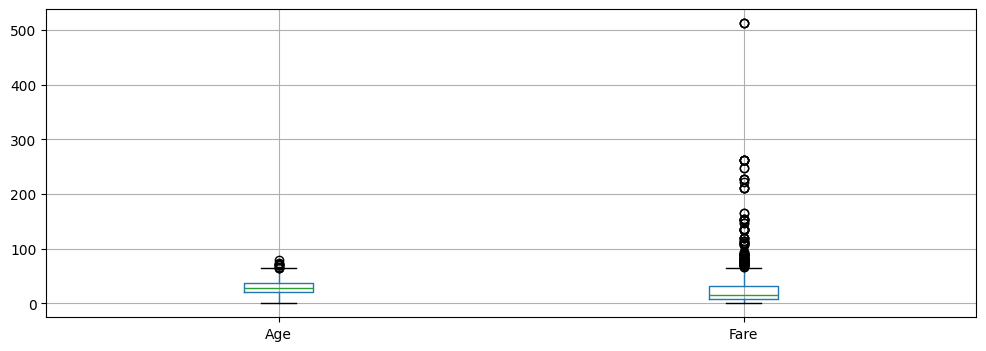

Age: 1.5×IQR bounds = [-6.7, 64.8]
  Outliers below: 0, above: 11

Fare: 1.5×IQR bounds = [-26.7, 65.6]
  Outliers below: 0, above: 116



In [ ]:
# boxplots
plt.figure(figsize=(12,4))
train[['Age','Fare']].boxplot()
plt.show()

# show extreme quantiles
for col in ['Age','Fare']:
    q1, q3 = train[col].quantile([0.25,0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    print(f"{col}: 1.5×IQR bounds = [{lower:.1f}, {upper:.1f}]")
    print(f"  Outliers below: {(train[col] < lower).sum()}, above: {(train[col] > upper).sum()}\n")


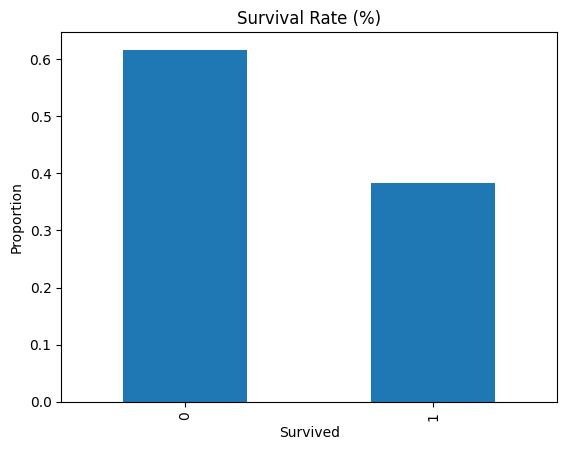

Survived
0    549
1    342
Name: count, dtype: int64


In [ ]:
train['Survived'].value_counts(normalize=True).plot.bar()
plt.title("Survival Rate (%)")
plt.ylabel("Proportion")
plt.show()
print(train['Survived'].value_counts())

In [ ]:
for col in ['Pclass','Sex','Embarked']:
    print(col, train[col].value_counts(dropna=False), "\n")
# also check high-cardinality fields
print("Unique Tickets:", train['Ticket'].nunique())
print("Unique Names:", train['Name'].nunique())

Pclass Pclass
3    491
1    216
2    184
Name: count, dtype: int64 

Sex Sex
male      577
female    314
Name: count, dtype: int64 

Embarked Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64 

Unique Tickets: 681
Unique Names: 891


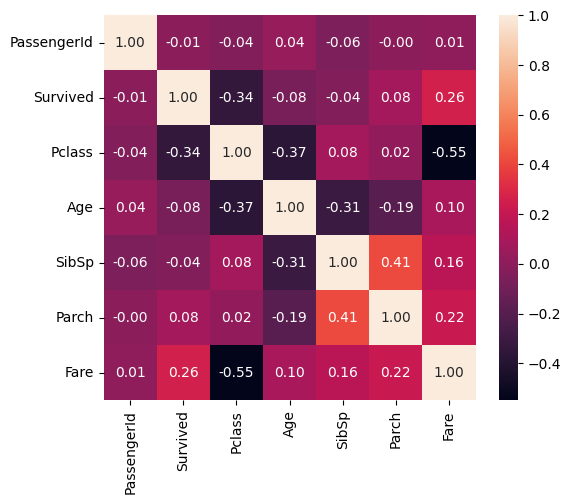

In [ ]:
# numeric correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(train.select_dtypes('number').corr(), annot=True, fmt=".2f")
plt.show()


In [ ]:
# Method 1: Drop missing values + outlier removal

df1 = train.copy()

# 1) Drop rows where Age or Embarked is missing, and drop Cabin (77% missing)
df1 = df1.dropna(subset=['Age','Embarked']).drop('Cabin', axis=1)

# 2) Remove extreme outliers using the 1.5×IQR bounds
#    Age > 64.8, Fare > 65.6
df1 = df1[(df1['Age'] <= 64.8) & (df1['Fare'] <= 65.6)]

# 3) Drop text/high‐cardinality fields
df1 = df1.drop(['PassengerId','Name','Ticket'], axis=1)

# Resulting DataFrame ready for encoding/modeling:
print("After Method 1 cleaning:", df1.shape)
df1.head()

After Method 1 cleaning: (603, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S


In [20]:
# — Cell 3: Method 2 —
import pandas as pd
from sklearn.model_selection   import train_test_split
from sklearn.preprocessing     import StandardScaler
from sklearn.ensemble          import RandomForestClassifier
from sklearn.metrics           import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)
from imblearn.over_sampling    import SMOTE

# Copy and robust-clean
df2 = train.copy()
df2['Age']      = df2['Age'].fillna(0)
df2['Embarked'] = df2['Embarked'].fillna('U')
# Cap outliers
low_f, high_f = df2['Fare'].quantile([0.01, 0.99])
df2['Fare'] = df2['Fare'].clip(low_f, high_f)
df2['Age']  = df2['Age'].clip(-6.7, 64.8)
# Extract Deck
df2['Deck'] = df2['Cabin'].fillna('Unknown').str[0]
# Drop raw text
df2 = df2.drop(['PassengerId','Cabin','Ticket','Name'], axis=1)

# Encode & scale
X2 = pd.get_dummies(df2.drop('Survived', axis=1), drop_first=True)
num_cols = ['Age','Fare','SibSp','Parch']
X2[num_cols] = StandardScaler().fit_transform(X2[num_cols])
y2 = df2['Survived']

# Split + SMOTE
X2_tr, X2_val, y2_tr, y2_val = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)
X2_res, y2_res = SMOTE(random_state=42).fit_resample(X2_tr, y2_tr)

# Train & evaluate
model2 = RandomForestClassifier(random_state=42)
model2.fit(X2_res, y2_res)
y2_pred = model2.predict(X2_val)

print("=== Method 2 Performance ===")
print(f"Accuracy:  {accuracy_score(y2_val, y2_pred):.3f}")
print(f"Precision: {precision_score(y2_val, y2_pred):.3f}")
print(f"Recall:    {recall_score(y2_val, y2_pred):.3f}")
print(f"F1-score:  {f1_score(y2_val, y2_pred):.3f}")
print("Confusion Matrix:\n", confusion_matrix(y2_val, y2_pred))



=== Method 2 Performance ===
Accuracy:  0.760
Precision: 0.671
Recall:    0.739
F1-score:  0.703
Confusion Matrix:
 [[85 25]
 [18 51]]


In [ ]:
from google.colab import files
uploaded = files.upload()      # a file‐picker UI will pop up



Saving train.csv to train.csv


In [ ]:
# (Optional) list files to confirm
!ls -lh

total 64K
drwxr-xr-x 1 root root 4.0K Apr 24 18:20 sample_data
-rw-r--r-- 1 root root  60K Apr 26 17:43 train.csv


In [ ]:
import pandas as pd
train = pd.read_csv('train.csv')

=== Voting (Original Data) ===
Accuracy:  0.832
Precision: 0.842
Recall:    0.696
F1-score:  0.762


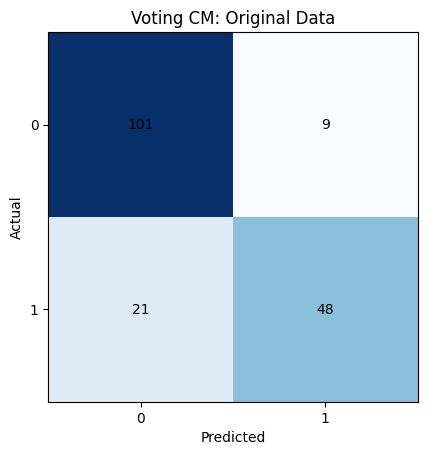

In [ ]:
#Ml on original data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1) Load data (now that train.csv is present)
train = pd.read_csv('train.csv')

# 2) Preprocess exactly as "Original"
X0 = train.drop(['Survived','PassengerId','Name','Ticket','Cabin'], axis=1)
y0 = train['Survived']
X0['Age']      = SimpleImputer(strategy='median').fit_transform(X0[['Age']])
X0['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(X0[['Embarked']]).ravel()
X0 = pd.get_dummies(X0, drop_first=True)
num_cols = X0.select_dtypes(include='number').columns
X0[num_cols] = StandardScaler().fit_transform(X0[num_cols])

# 3) Split
X0_tr, X0_val, y0_tr, y0_val = train_test_split(
    X0, y0, test_size=0.2, random_state=42, stratify=y0
)

# 4) Voting ensemble
voting_orig = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42))
    ],
    voting='soft', n_jobs=-1
)
voting_orig.fit(X0_tr, y0_tr)
y0_vot = voting_orig.predict(X0_val)

# 5) Evaluate
print("=== Voting (Original Data) ===")
print(f"Accuracy:  {accuracy_score(y0_val, y0_vot):.3f}")
print(f"Precision: {precision_score(y0_val, y0_vot):.3f}")
print(f"Recall:    {recall_score(y0_val, y0_vot):.3f}")
print(f"F1-score:  {f1_score(y0_val, y0_vot):.3f}")

# 6) Plot confusion matrix
cm0 = confusion_matrix(y0_val, y0_vot)
fig, ax = plt.subplots()
ax.imshow(cm0, cmap='Blues')
ax.set_xlabel('Predicted'); ax.set_ylabel('Actual')
ax.set_xticks([0,1]); ax.set_yticks([0,1])
ax.set_xticklabels(['0','1']); ax.set_yticklabels(['0','1'])
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm0[i,j], ha='center', va='center')
plt.title('Voting CM: Original Data')
plt.show()

=== Voting Classifier (Method 1) ===
Accuracy:  0.876
Precision: 0.868
Recall:    0.767
F1-score:  0.815


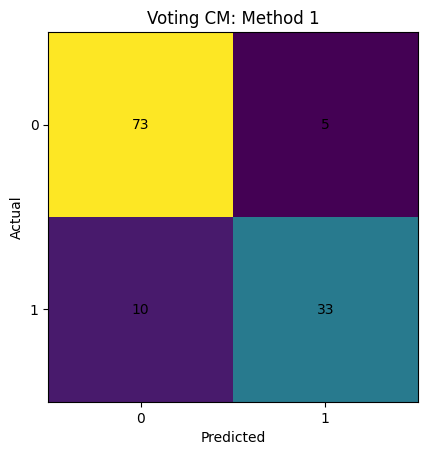

In [25]:
# === Voting Classifier on Method 1 Cleaned Data ===
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1) Load your Method 1 cleaned DataFrame (or repeat the cleaning here)
#    If you already have df1 from your previous cell, skip the reload.
df1 = pd.read_csv('train.csv')\
        .dropna(subset=['Age','Embarked'])\
        .drop('Cabin', axis=1)
df1 = df1[(df1['Age'] <= 64.8) & (df1['Fare'] <= 65.6)]
df1 = df1.drop(['PassengerId','Name','Ticket'], axis=1)

# 2) Prepare features & target
X1 = pd.get_dummies(df1.drop('Survived', axis=1), drop_first=True)
y1 = df1['Survived']

# 3) Split into train & validation
X1_tr, X1_val, y1_tr, y1_val = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y1
)

# 4) Build the soft-voting ensemble
voting_m1 = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42))
    ],
    voting='soft',
    n_jobs=-1
)
voting_m1.fit(X1_tr, y1_tr)
y1_vot = voting_m1.predict(X1_val)

# 5) Compute & print metrics
print("=== Voting Classifier (Method 1) ===")
print(f"Accuracy:  {accuracy_score(y1_val, y1_vot):.3f}")
print(f"Precision: {precision_score(y1_val, y1_vot):.3f}")
print(f"Recall:    {recall_score(y1_val, y1_vot):.3f}")
print(f"F1-score:  {f1_score(y1_val, y1_vot):.3f}")

# 6) Plot confusion matrix
cm1 = confusion_matrix(y1_val, y1_vot)
fig, ax = plt.subplots()
ax.imshow(cm1)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['0','1'])
ax.set_yticklabels(['0','1'])
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm1[i,j], ha='center', va='center')
plt.title('Voting CM: Method 1')
plt.show()


Best RF params: {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 10}
=== Method 2 (Tuned Voting) ===
Accuracy:  0.810
Precision: 0.818
Recall:    0.652
F1-score:  0.726


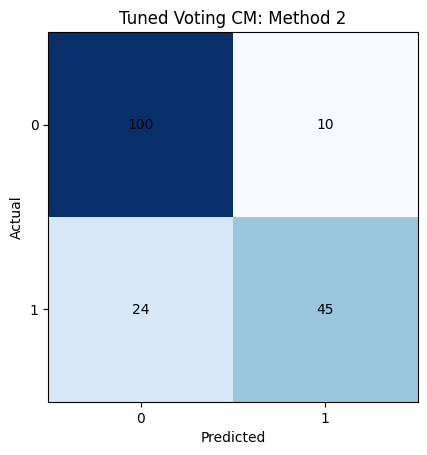

In [29]:
# === Method 2: Zero-Impute + Cap Outliers + Deck + RF Hyper-Tuning ===

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# 1) Load & clean exactly as before
train = pd.read_csv('train.csv')
df2 = train.copy()
df2['Age']      = df2['Age'].fillna(0)
df2['Embarked'] = df2['Embarked'].fillna('U')
low_f, high_f   = df2['Fare'].quantile([0.01,0.99])
df2['Fare']     = df2['Fare'].clip(low_f, high_f)
df2['Age']      = df2['Age'].clip(-6.7, 64.8)
df2['Deck']     = df2['Cabin'].fillna('Unknown').str[0]
df2 = df2.drop(['PassengerId','Cabin','Ticket','Name'], axis=1)

# 2) Encode & scale
X2 = pd.get_dummies(df2.drop('Survived', axis=1), drop_first=True)
for c in ['Age','Fare','SibSp','Parch']:
    X2[[c]] = StandardScaler().fit_transform(X2[[c]])
y2 = df2['Survived']

# 3) Split
X2_tr, X2_val, y2_tr, y2_val = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

# 4) Quick RF hyper-parameter search
param_dist = {
    'n_estimators': [100,200,500],
    'max_depth':    [None,5,10],
    'max_features':['sqrt','log2']
}
rs = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_dist, n_iter=8, cv=3, scoring='accuracy', n_jobs=-1, random_state=42
)
rs.fit(X2_tr, y2_tr)
best_rf = rs.best_estimator_
print("Best RF params:", rs.best_params_)

# 5) Build Voting ensemble with tuned RF + LR + GB
v2 = VotingClassifier([
        ('rf', best_rf),
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42))
    ], voting='soft', n_jobs=-1)

v2.fit(X2_tr, y2_tr)
y2_pred = v2.predict(X2_val)

# 6) Evaluate
print("=== Method 2 (Tuned Voting) ===")
print(f"Accuracy:  {accuracy_score(y2_val, y2_pred):.3f}")
print(f"Precision: {precision_score(y2_val, y2_pred):.3f}")
print(f"Recall:    {recall_score(y2_val, y2_pred):.3f}")
print(f"F1-score:  {f1_score(y2_val, y2_pred):.3f}")

# 7) Confusion matrix
cm2 = confusion_matrix(y2_val, y2_pred)
fig, ax = plt.subplots()
ax.imshow(cm2, cmap='Blues')
ax.set_xlabel('Predicted'); ax.set_ylabel('Actual')
ax.set_xticks([0,1]); ax.set_yticks([0,1])
ax.set_xticklabels(['0','1']); ax.set_yticklabels(['0','1'])
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm2[i,j], ha='center', va='center')
plt.title('Tuned Voting CM: Method 2')
plt.show()

In [30]:
# === Final Comparison of All Models ===

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1) Gather your true vs. predicted pairs:
orig_true, orig_pred = y0_val, y0_vot
m1_true,   m1_pred   = y1_val, y1_vot
m2_true,   m2_pred   = y2_val, y2_pred

# 2) Compute each metric for each method
comparison = pd.DataFrame({
    'Original': [
        accuracy_score(orig_true, orig_pred),
        precision_score(orig_true, orig_pred),
        recall_score(orig_true, orig_pred),
        f1_score(orig_true, orig_pred)
    ],
    'Method 1': [
        accuracy_score(m1_true, m1_pred),
        precision_score(m1_true, m1_pred),
        recall_score(m1_true, m1_pred),
        f1_score(m1_true, m1_pred)
    ],
    'Method 2': [
        accuracy_score(m2_true, m2_pred),
        precision_score(m2_true, m2_pred),
        recall_score(m2_true, m2_pred),
        f1_score(m2_true, m2_pred)
    ]
}, index=['Accuracy','Precision','Recall','F1-score']).round(3)

# 3) Display side-by-side
print(comparison)


           Original  Method 1  Method 2
Accuracy      0.832     0.876     0.810
Precision     0.842     0.868     0.818
Recall        0.696     0.767     0.652
F1-score      0.762     0.815     0.726
